In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [3]:
# Load the traning data set
# Volume show any correlation between other features less than other data, so it will be ignored with Open interest

data_set_train = pd.read_csv("Train_data.csv")
data_set_train.head()

training_set = data_set_train.iloc[1:,4:5 ].values
print(training_set)
print(training_set.shape)


[[ 943.3]
 [ 943.1]
 [ 942.6]
 ...
 [1527.2]
 [1527.1]
 [1525.5]]
(43083, 1)


In [4]:
#start training
scaler= MinMaxScaler(feature_range= (0,1))
scaler_training_set = scaler.fit_transform(training_set)

scaler_training_set

array([[0.37433208],
       [0.37413418],
       [0.37363942],
       ...,
       [0.95210766],
       [0.95200871],
       [0.95042549]])

In [5]:
# create x_train and y_train data structures
X_train =[]
Y_train =[]
for i in range(60,len(training_set)):
    X_train.append(scaler_training_set[i-60:i,0])
    Y_train.append(scaler_training_set[i,0])
X_train = np.array(X_train)
Y_train = np.array(Y_train)
print(X_train.shape,Y_train.shape)


(43023, 60) (43023,)


In [10]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape
X_train[0:5]

array([[[0.37433208],
        [0.37413418],
        [0.37363942],
        [0.37472788],
        [0.3763111 ],
        [0.37502474],
        [0.37472788],
        [0.37551949],
        [0.37601425],
        [0.37700376],
        [0.37700376],
        [0.376509  ],
        [0.37601425],
        [0.37621215],
        [0.37621215],
        [0.37502474],
        [0.37492579],
        [0.37482684],
        [0.37581635],
        [0.37472788],
        [0.37452998],
        [0.37423313],
        [0.37472788],
        [0.37522264],
        [0.37601425],
        [0.37710271],
        [0.3761132 ],
        [0.376509  ],
        [0.37799327],
        [0.37829012],
        [0.37848803],
        [0.37898278],
        [0.37967544],
        [0.37918068],
        [0.37868593],
        [0.37799327],
        [0.37898278],
        [0.37927964],
        [0.37977439],
        [0.37937859],
        [0.37868593],
        [0.38086285],
        [0.38046705],
        [0.38284188],
        [0.38294083],
        [0

In [7]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [8]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [11]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error',metrics=['accuracy'])
regressor.fit(X_train,Y_train, epochs=100,batch_size=32)

Epoch 1/100
1345/1345 [==============================] - 113s 79ms/step - loss: 0.0025 - accuracy: 4.6487e-05
Epoch 2/100
1345/1345 [==============================] - 101s 75ms/step - loss: 0.0010 - accuracy: 4.6487e-05
Epoch 3/100
1345/1345 [==============================] - 96s 72ms/step - loss: 7.4929e-04 - accuracy: 4.6487e-05
Epoch 4/100
1345/1345 [==============================] - 156s 116ms/step - loss: 5.9972e-04 - accuracy: 4.6487e-05
Epoch 5/100
1345/1345 [==============================] - 246s 183ms/step - loss: 5.4651e-04 - accuracy: 4.6487e-05
Epoch 6/100
1345/1345 [==============================] - 214s 159ms/step - loss: 5.1988e-04 - accuracy: 4.6487e-05
Epoch 7/100
1345/1345 [==============================] - 255s 190ms/step - loss: 4.9413e-04 - accuracy: 4.6487e-05
Epoch 8/100
 256/1345 [====>.........................] - ETA: 1:35 - loss: 4.7939e-04 - accuracy: 0.0000e+00

In [10]:
data_test = pd.read_csv("Test_data.csv")
print(data_test)
acture_stock_price = data_test.iloc[:,4:5].values
Target = data_test["Target"].values
dataset_total = pd.concat((data_set_train['Close'], data_test['Close']),axis= 0)
inputs = dataset_total[len(dataset_total)-len(data_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(60,len(data_test)+60):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

               Date/Time  Open  High   Low  Close  Volume  Target
0    2020-09-21 13:30:00  51.6  51.6  51.3   51.3  142510     0.0
1    2020-09-21 14:00:00  51.3  51.3  51.2   51.2  238740     0.0
2    2020-09-21 14:30:00  51.2  51.2  51.2   51.2   91530     0.0
3    2020-09-22 09:00:00  50.8  51.1  50.7   50.9  240240     0.0
4    2020-09-22 09:30:00  51.0  51.2  50.9   50.9  172250     0.0
..                   ...   ...   ...   ...    ...     ...     ...
594  2020-12-22 11:00:00  57.5  57.8  57.3   57.4  359420     0.0
595  2020-12-22 13:00:00  57.5  57.7  57.5   57.5  177010     1.0
596  2020-12-22 13:30:00  57.5  58.0  57.5   58.0  713840     1.0
597  2020-12-22 14:00:00  58.0  58.5  58.0   58.1  616700     1.0
598  2020-12-22 14:30:00  58.1  58.1  58.1   58.1   11170     0.0

[599 rows x 7 columns]
(599, 60, 1)


In [11]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
Target_pred = [None]
for i in range(1,len(predicted_stock_price)):
    if predicted_stock_price[i-1]>=predicted_stock_price[i]:
        Target_pred.append(0)
    else:
        Target_pred.append(1)
print(predicted_stock_price[0:10])


19/19 [==============================] - 1s 18ms/step
[[46.512604]
 [49.176098]
 [50.627827]
 [50.96242 ]
 [50.756004]
 [50.559456]
 [50.48956 ]
 [50.498585]
 [50.438118]
 [50.356552]]


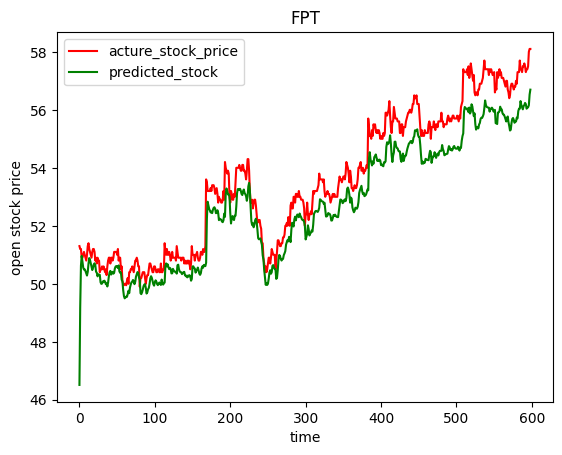

In [12]:
plt.plot(acture_stock_price, color='red', label = 'acture_stock_price')
plt.plot(predicted_stock_price, color='green', label = 'predicted_stock')
plt.title('Vn30fm')
plt.xlabel('time')
plt.ylabel('open stock price')
plt.legend()

In [13]:
from sklearn.metrics import mean_squared_error,precision_score
print(len(Target),len(Target_pred))
print('Mean square error: ', mean_squared_error(Target[1:], Target_pred[1:]))
print('precision_score',precision_score(Target[1:], Target_pred[1:]))


599 599
Mean square error:  0.5618729096989966
precision_score 0.3079470198675497


In [14]:
print(Target[1:10])
print(Target_pred[1:10])

[0. 0. 0. 0. 1. 1. 0. 0. 0.]
[1, 1, 1, 0, 0, 0, 1, 0, 0]
